In [37]:
import numpy as np 
import pandas as pd 

In [38]:
data=pd.read_csv("Fertilizer_Prediction.csv")
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,label
0,26,52,38,Sandy,Maize,37,0,0,Tomato
1,29,52,45,Loamy,Sugarcane,12,0,36,Herbs
2,34,65,62,Black,Cotton,7,9,30,Rose
3,32,62,34,Red,Tobacco,22,0,20,MariGold
4,28,54,46,Clayey,Paddy,35,0,0,Tomato


## Dataset Informations

In [10]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


### Data Preprocessing

#### Finding the length of the Dataset

In [11]:
data.shape

(99, 9)

#### Finding the missing values

In [20]:
data.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
label          0
dtype: int64

**No Missing values detected**

### Visualizing the Dataset

<Axes: xlabel='label', ylabel='count'>

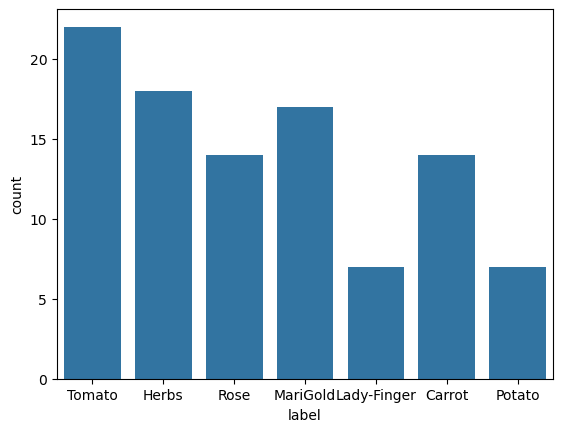

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='label')

### Removing Categorical Variable from the Dataset which is soil type and crop type

In [22]:
data['Soil Type'].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [23]:
data['Crop Type'].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

### As Soil Type and Crop Type are Categorical Variable mapping them to a numerical variable for good model accuracy

In [24]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11
    
}

In [25]:
data['Soil_Num']=data['Soil Type'].map(soil_dict)
data['Crop_Num']=data['Crop Type'].map(crop_dict)

In [26]:
data=data.drop(['Soil Type','Crop Type'],axis=1)
data.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,label,Soil_Num,Crop_Num
0,26,52,38,37,0,0,Tomato,2,11
1,29,52,45,12,0,36,Herbs,1,1
2,34,65,62,7,9,30,Rose,4,2
3,32,62,34,22,0,20,MariGold,5,7
4,28,54,46,35,0,0,Tomato,3,4


#### Splitting the Dataset into X and Y 

In [27]:
X=data.drop(['label'],axis=1)
Y=data['label']

### Splitting Dataset into Train and Test for checking the Accuracy

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
X_train.shape

(79, 8)

In [30]:
X_test.shape

(20, 8)

#### Model Building 

**Importing all the Classifier Algorithms**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for name,md in models.items():
    md.fit(X_train,Y_train)
    ypred=md.predict(X_test)
    
    print(f"the Accuracy of {name} is ",accuracy_score(Y_test,ypred))
    


C:\Users\Paras\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the Accuracy of Logistic Regression is  1.0
the Accuracy of Naive Bayes is  1.0
the Accuracy of Support Vector Machine is  0.65
the Accuracy of K-Nearest Neighbors is  0.9
the Accuracy of Decision Tree is  1.0
the Accuracy of Random Forest is  0.95
the Accuracy of Bagging is  1.0
the Accuracy of AdaBoost is  0.65


C:\Users\Paras\New folder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


the Accuracy of Gradient Boosting is  0.9
the Accuracy of Extra Trees is  0.85


### Let's Take Decision Tree Classifier for our model building

In [33]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
ypred=classifier.predict(X_test)
accuracy_score(Y_test,ypred)

1.0

In [34]:
def recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num):
    features = np.array([[Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num]])
    prediction = classifier.predict(features).reshape(1,-1)
    
    return prediction[0] 

In [48]:
Temparature=33
Humidity=64
Moisture=50
Nitrogen=41
Potassium=0
Phosphorous=0
Soil_Num=1
Crop_Num=6
predict=recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num)
predict[0]

C:\Users\Paras\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Tomato'

In [41]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("Fertclassifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()